# Company Bankruptcy Prediction

Conduct your analysis using a cross-validation design.<br>
Conduct / improve upon previous EDA.<br>
__Build the following models at a minimum.__ <br>
--Random Forest Classifier<br>
--Gradient Boosted Trees<br>
--Extra Trees<br>
Conduct hyperparameter tuning for the following at a minimum. <br>
--n_estimators (number of trees) <br>
--max_features (maximum features considered for splitting a node)<br>
--max_depth (maximum number of levels in each tree)<br>
--splitting criteria (entropy or gini)<br>
Compare your models using the F1-Score on a 20% validation set.<br>
Generate predictions from your models, and submit at least two models to Kaggle.com for evaluation. Provide your Kaggle.com user name and a screen snapshot of your scores.

In [1]:
import pandas as pd
import random
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn import svm


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split-- 80 20

The Pareto Principle is also called the 80/20 rule. The general point is that, in most cases, 80% of effects come from 20% of causes.

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


<Axes: >

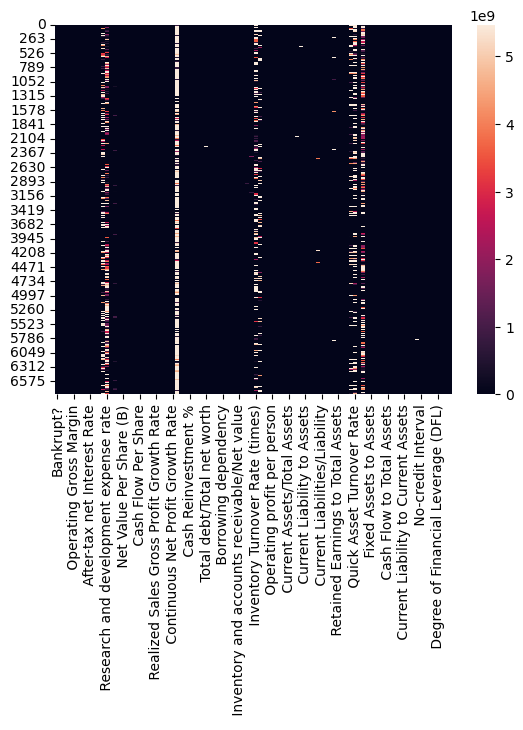

In [5]:
sns.heatmap(data, robust = True )

In [6]:
y = data['Bankrupt?']
y.unique()

array([1, 0])

In [7]:
x = data.drop('Bankrupt?',axis=1)

In [8]:
x.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [10]:
print("shape of original dataset :", data.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)


shape of original dataset : (6819, 96)
shape of input - training set (5455, 95)
shape of output - training set (5455,)
shape of input - testing set (1364, 95)
shape of output - testing set (1364,)


# RF classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [12]:
y_pred_gini = clf_gini.predict(x_test)
predictions_df = pd.DataFrame({'Predicted': y_pred_gini})

# Save the DataFrame to a CSV file named "gini_pred.csv"
predictions_df.to_csv('gini_pred.csv', index=False)

In [13]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9670


[Text(0.5, 0.875, 'x[89] <= 0.834\ngini = 0.062\nsamples = 5455\nvalue = [5279, 176]'),
 Text(0.25, 0.625, 'x[42] <= 0.106\ngini = 0.466\nsamples = 197\nvalue = [124, 73]'),
 Text(0.125, 0.375, 'x[79] <= 0.652\ngini = 0.291\nsamples = 17\nvalue = [3, 14]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.375, 'x[34] <= 0.63\ngini = 0.441\nsamples = 180\nvalue = [121, 59]'),
 Text(0.3125, 0.125, 'gini = 0.476\nsamples = 41\nvalue = [16, 25]'),
 Text(0.4375, 0.125, 'gini = 0.37\nsamples = 139\nvalue = [105, 34]'),
 Text(0.75, 0.625, 'x[39] <= 0.379\ngini = 0.038\nsamples = 5258\nvalue = [5155, 103]'),
 Text(0.625, 0.375, 'x[22] <= 0.103\ngini = 0.015\nsamples = 4617\nvalue = [4581, 36]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6875, 0.125, 'gini = 0.013\nsamples = 4612\nvalue = [4581, 31]'),
 Text(0.875, 0.375, 'x[2] <= 0.521\ngini = 0.187\nsamples = 641\nv

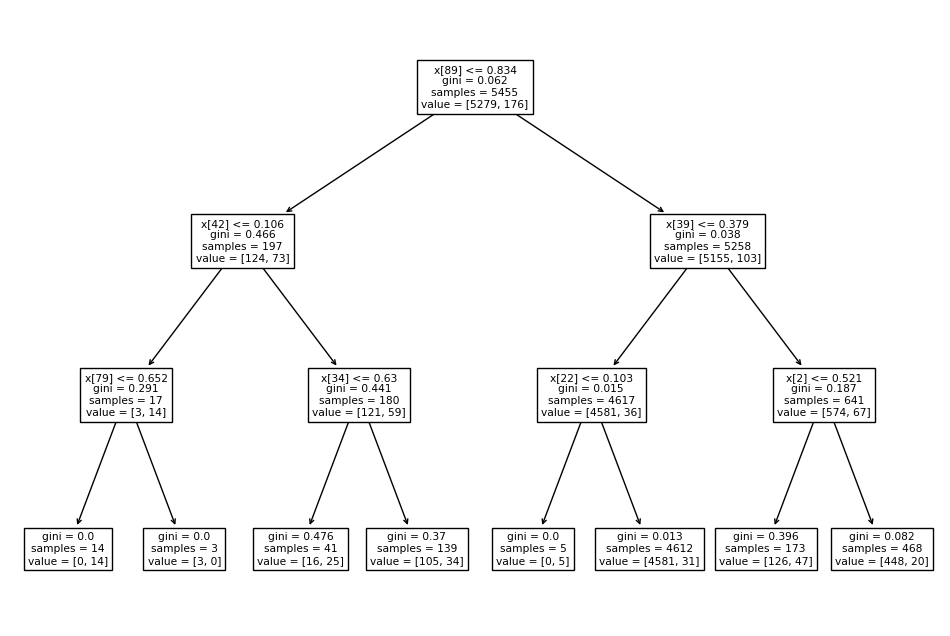

In [14]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train)) 

# GBM

In [15]:
print(x_train.shape)

(5455, 95)


In [43]:
from sklearn.ensemble import AdaBoostClassifier
import joblib

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
adaClass = ada_clf.fit(x_train, y_train)
adaClass

adaClassSubm = joblib.dump(adaClass, "adaClass.sav")

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Generate a synthetic dataset with 95 features for demonstration
x, y = make_classification(n_features=95, n_informative=20, n_classes=2,
                           n_clusters_per_class=1, n_samples=300, random_state=42)

# Create and train the AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_clf.fit(x, y)

# Apply PCA to reduce the number of features to 2
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x)

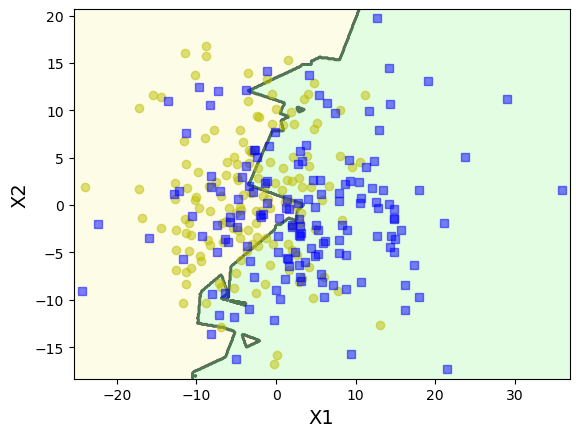

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X_reduced, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    if x.shape[1] == 2:
        # 2D feature space, directly plot decision boundary
        x1s = np.linspace(axes[0], axes[1], 100)
        x2s = np.linspace(axes[2], axes[3], 100)
        x1, x2 = np.meshgrid(x1s, x2s)
        X_new = np.c_[x1.ravel(), x2.ravel()]
        y_pred = clf.predict(X_new).reshape(x1.shape)
        custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
        plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
        if contour:
            custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
            plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", alpha=alpha)
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", alpha=alpha)
        plt.axis(axes)
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    else:
        # High-dimensional feature space, apply PCA for visualization
        pca = PCA(n_components=2)
        X_reduced = pca.fit_transform(x)
        x1_min, x1_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
        x2_min, x2_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                               np.arange(x2_min, x2_max, 0.1))
        Z = clf.predict(pca.inverse_transform(np.c_[xx1.ravel(), xx2.ravel()]))
        Z = Z.reshape(xx1.shape)
        custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=custom_cmap)
        if contour:
            custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
            plt.contour(xx1, xx2, Z, cmap=custom_cmap2, alpha=0.8)
        plt.plot(X_reduced[y == 0, 0], X_reduced[y == 0, 1], "yo", alpha=alpha)
        plt.plot(X_reduced[y == 1, 0], X_reduced[y == 1, 1], "bs", alpha=alpha)
        plt.xlabel("X1", fontsize=14)
        plt.ylabel("X2", fontsize=14)


plot_decision_boundary(ada_clf, X_reduced, y)
plt.show()



/Users/Nora/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/Nora/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/Nora/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/Nora/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/Nora/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/Nora/miniconda3/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid fe

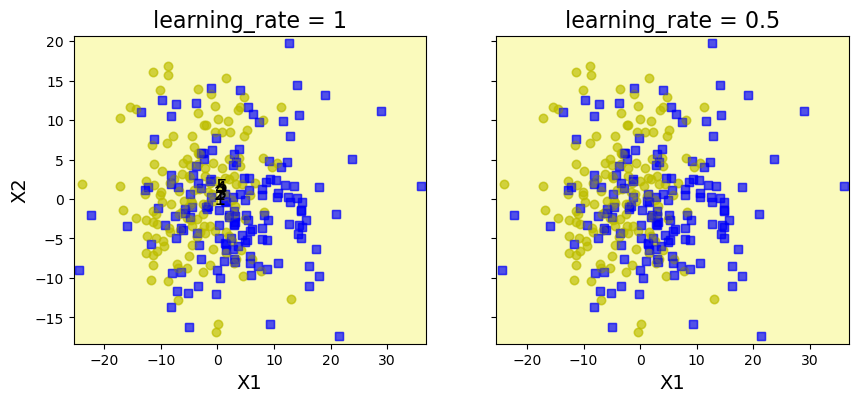

In [19]:
m = len(x_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(x_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(x_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, x, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(x_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
          for y_pred in gbrt.staged_predict(x_test)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(x_train, y_train)

submit.to_csv('subm.csv', index=False)

GradientBoostingRegressor(max_depth=2, n_estimators=119, random_state=42)

In [21]:
min_error = np.min(errors)
print(min_error)

0.02302764520734364


 Liability-Assets Flag                       0.000000
 Current Liabilities/Liability               0.000000
 Continuous Net Profit Growth Rate           0.000000
 Regular Net Profit Growth Rate              0.000000
 Net Worth Turnover Rate (times)             0.000000
                                              ...    
 Net profit before tax/Paid-in capital       5.410477
 Borrowing dependency                        6.594407
 Persistent EPS in the Last Four Seasons     8.005134
 Net Income to Stockholder's Equity          8.578026
 Net Value Growth Rate                      17.863330
Length: 95, dtype: float64


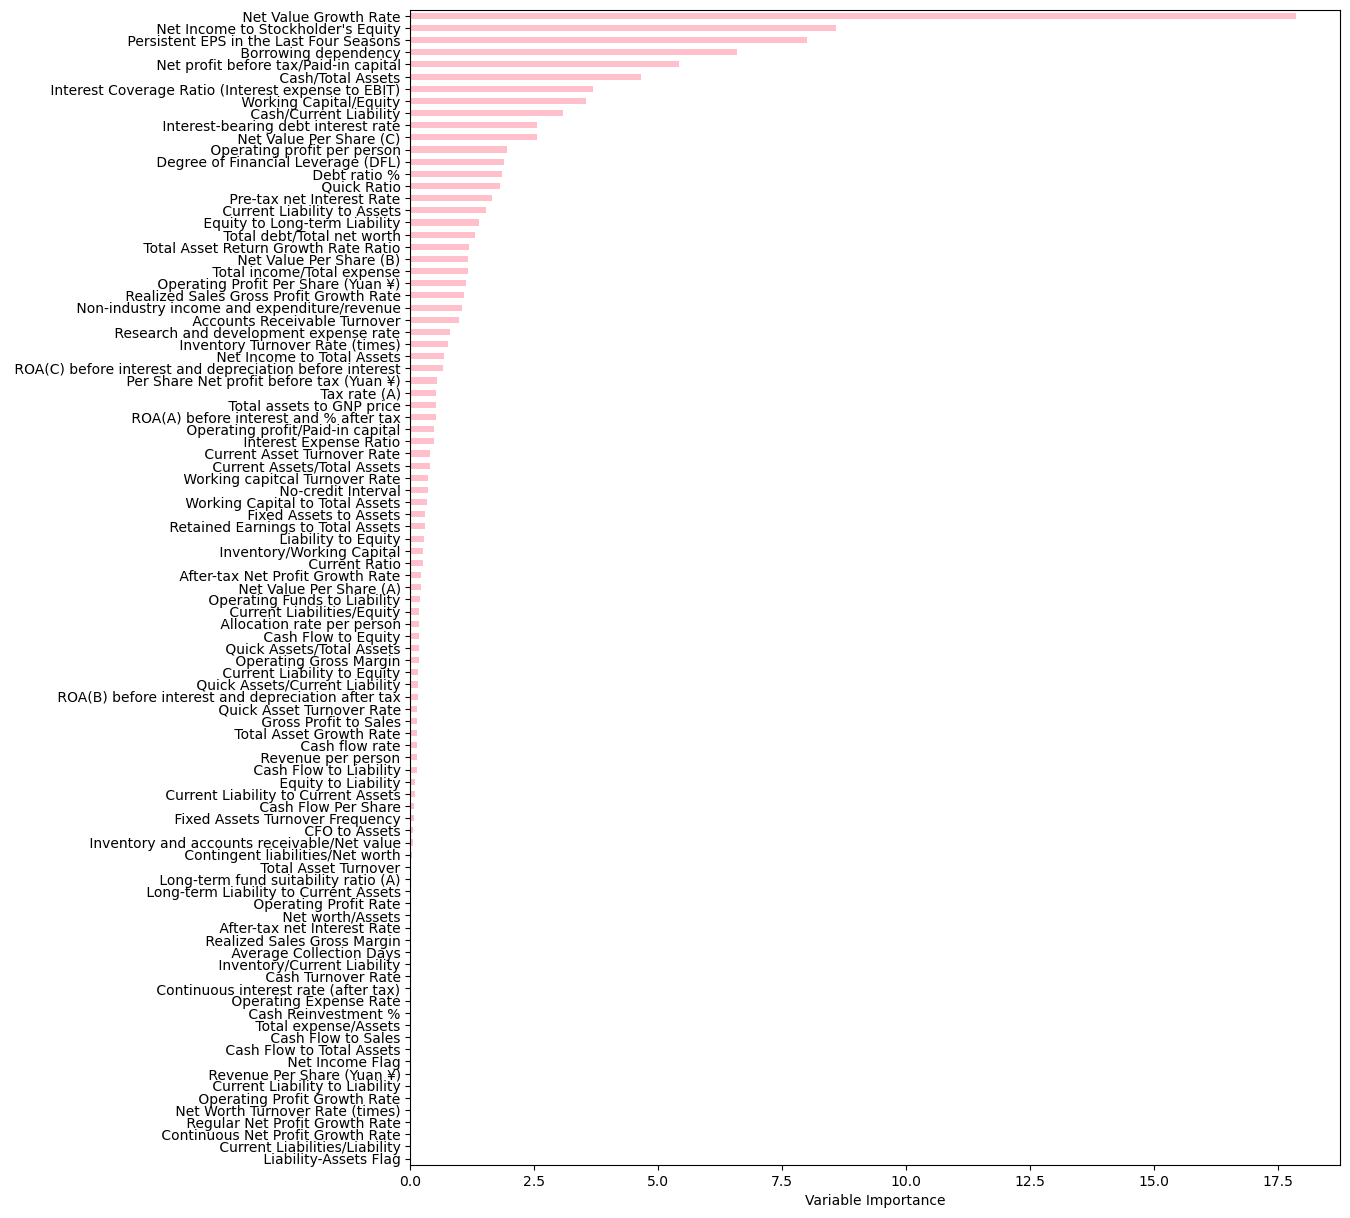

In [23]:
plt.figure(figsize=(12,15))

feature_importance = gbrt.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=x_train.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='pink', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# Extra Trees

Extra trees is often utiized because it is robust to noise and irrelevant features: Extra Trees Classifier utilizes multiple decision trees and selects features based on their importance scores, making it less sensitive to noise and irrelevant features. It can effectively handle datasets with a large number of features and noisy data.

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [31]:
from sklearn.ensemble import ExtraTreesClassifier

# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)
 
# Training the model
extra_tree_forest.fit(x_train, y_train)
 
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
 
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)

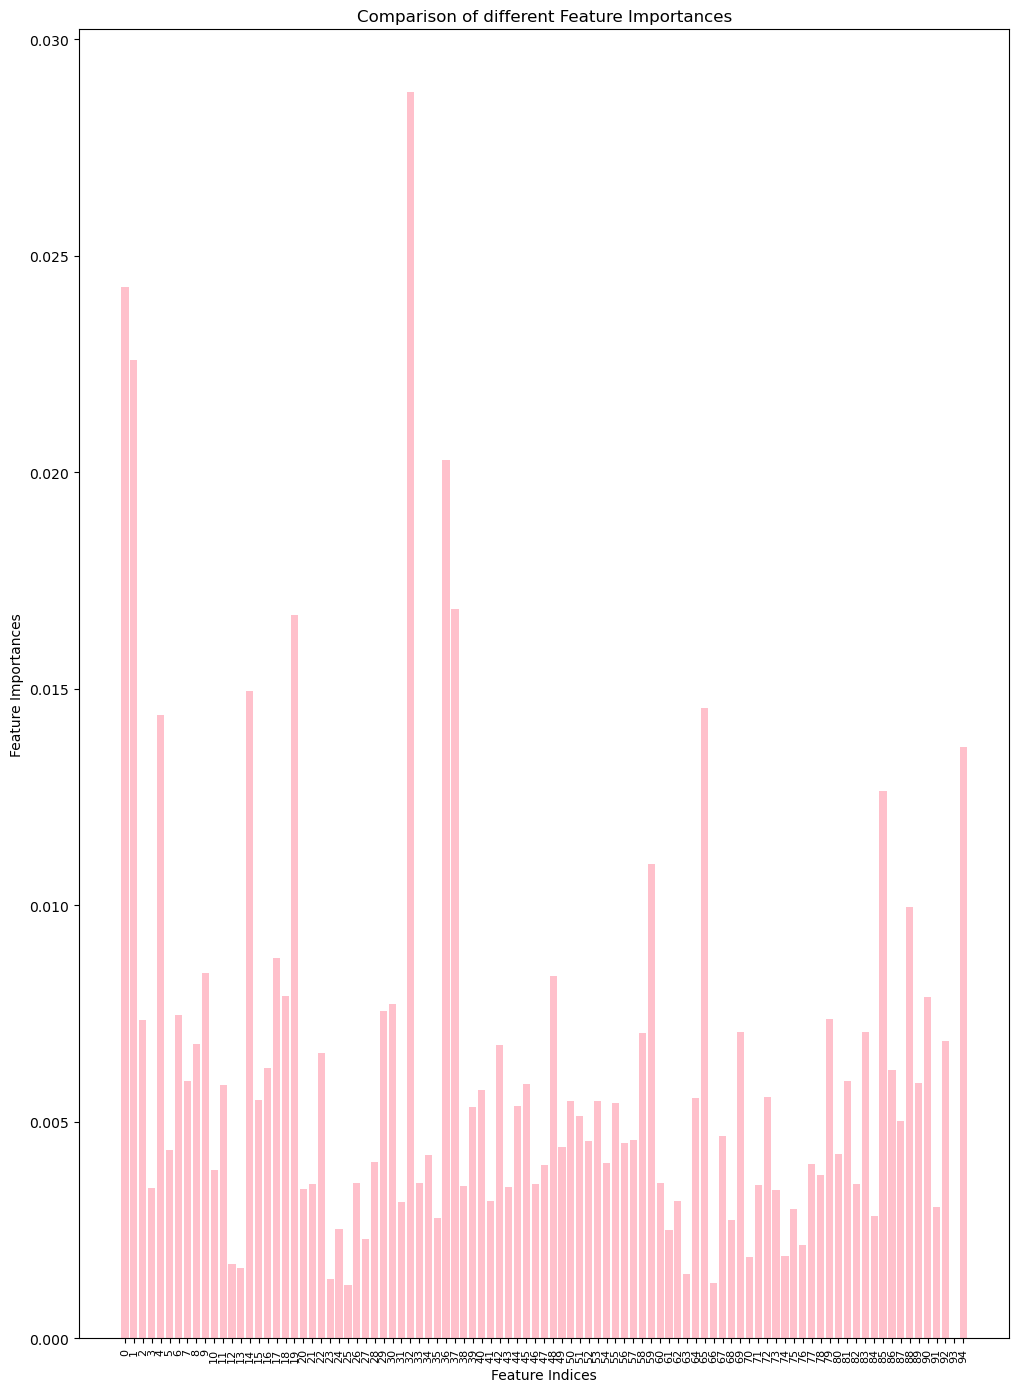

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,17))


plt.bar(range(len(feature_importance_normalized)), feature_importance_normalized, color = 'pink')
plt.xlabel('Feature Indices')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.xticks(range(len(feature_importance_normalized)), rotation=90, fontsize = 8)  # To show numeric indices as x-axis labels
plt.show()

# param tuning

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import random 

# Instantiate the base estimator (e.g., DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier()

# Instantiate the AdaBoostClassifier with the base estimator
ada_clf = AdaBoostClassifier(base_estimator=base_estimator)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0],
    'base_estimator__max_depth': [1, 2, 3],  # Update 'base_estimator__max_depth' to 'base_estimator__max_depth'
    'base_estimator__criterion': ['entropy', 'gini'],  # Update 'base_estimator__criterion' to 'base_estimator__criterion'
    'base_estimator__max_features': ['auto', 'sqrt', 'log2'],  # Update 'base_estimator__max_features' to 'base_estimator__max_features'
}

grid_search = GridSearchCV(ada_clf, param_grid, scoring='f1', cv=5)
grid_search.fit(x_train, y_train)


/Users/Nora/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/Nora/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/Nora/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/Nora/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/Nora/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warni

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__criterion': ['entropy', 'gini'],
                         'base_estimator__max_depth': [1, 2, 3],
                         'base_estimator__max_features': ['auto', 'sqrt',
                                                          'log2'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [39]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [40]:
from sklearn.metrics import f1_score

y_pred_val = best_model.predict(x_test)
f1_score_val = f1_score(y_train, y_train)

print("Best Hyperparameters:\n", best_params)
print("F1-Score on Validation Set:\n", f1_score_val)

Best Hyperparameters:
 {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'base_estimator__max_features': 'sqrt', 'learning_rate': 0.5, 'n_estimators': 100}
F1-Score on Validation Set:
 1.0
